In [81]:
# data manipulation
import numpy as np, cv2, os

#keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Convolution2D, MaxPooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
# training and testing data 

train_dir = "dataset/Train/digits"
test_dir = "dataset/Test/digits"
IMG_WIDTH, IMG_HEIGHT = (32, 32)

In [40]:
os.listdir(train_dir)

['digit_0',
 'digit_1',
 'digit_2',
 'digit_3',
 'digit_4',
 'digit_5',
 'digit_6',
 'digit_7',
 'digit_8',
 'digit_9']

In [85]:
# PREPROCESSING DATA 

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                 batch_size=5,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(IMG_WIDTH, IMG_HEIGHT),
                                            batch_size=5,
                                            class_mode='categorical') 

Found 17000 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.


In [ ]:
for file in os.listdir(os.path.join(test_dir, test_dirs[0])):
    img_path = "{}/{}/{}".format(test_dir, test_dirs[0], file)
    img = cv2.imread(img_path)
    plt.imshow(img)
    plt.title(img.shape)
    plt.show()

In [76]:
img = test_dir + "/digit_1/4750.png" 
img = cv2.imread(img)

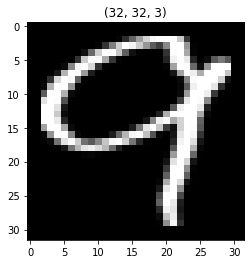

In [79]:
plt.imshow(img)
plt.title(img.shape)
plt.show()

In [86]:
# Initializing the CNN
classifier = Sequential()

# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(IMG_WIDTH, IMG_WIDTH, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.1))

# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=10, activation='softmax')) # softmax for more than 2

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [90]:
classifier.compile(optimizer='adam', 
                   loss='categorical_crossentropy', 
                   metrics=['accuracy']) # categorical_crossentropy for more than 2

In [91]:
history = classifier.fit_generator(
        training_set,
        steps_per_epoch=600, # No of images in training set
        epochs=2,
        validation_data=test_set,
        validation_steps=30)# No of images in test set

Epoch 1/2
600/600 [==============================] - 37s 61ms/step - loss: 0.8374 - accuracy: 0.7077 - val_loss: 0.6711 - val_accuracy: 0.8400
Epoch 2/2
600/600 [==============================] - 30s 51ms/step - loss: 0.4026 - accuracy: 0.8643 - val_loss: 0.2010 - val_accuracy: 0.9267


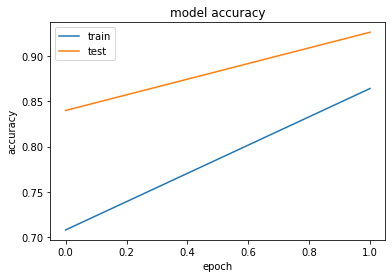

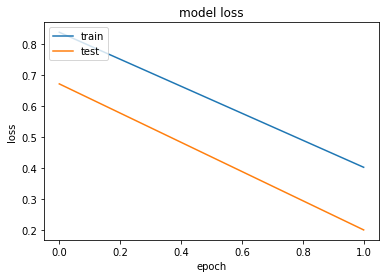

In [106]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [105]:
history.history

{'val_loss': [0.6710880398750305, 0.2009742259979248],
 'val_accuracy': [0.8399999737739563, 0.9266666769981384],
 'loss': [0.8373598050729683, 0.40261812721689544],
 'accuracy': [0.7076667, 0.86433333]}

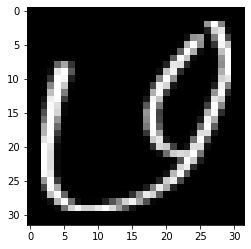

In [123]:
img = test_dir + "/digit_7/5709.png" 
img = cv2.imread(img)
plt.imshow(img)
plt.show()

In [124]:
predict = classifier.predict(img.reshape(1, IMG_WIDTH, IMG_HEIGHT, 3))

In [125]:
np.argmax(predict)

7

In [128]:
def plotnpredict(img_path):
    img = cv2.imread(img_path)
    predict = classifier.predict(img.reshape(1, IMG_WIDTH, IMG_HEIGHT, 3))
    plt.imshow(img)
    plt.title("Predicted: {}".format(np.argmax(predict)))
    plt.show()
    

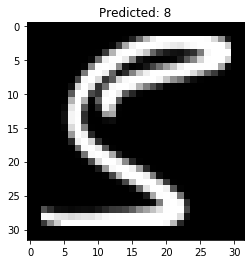

In [131]:
img = test_dir + "/digit_9/7476.png"
plotnpredict(img)

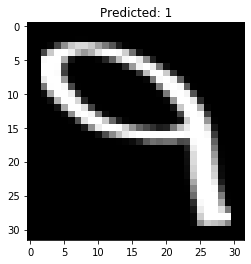

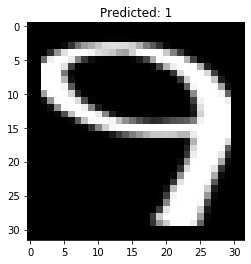

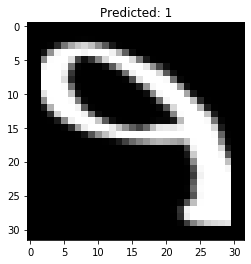

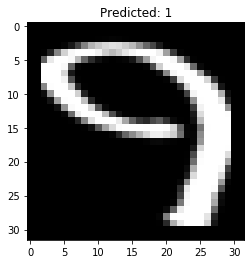

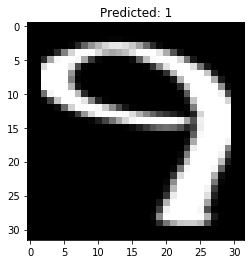

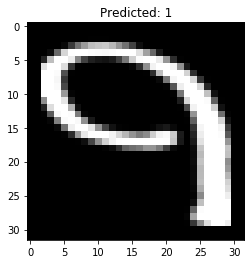

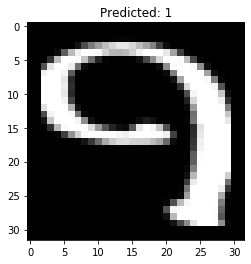

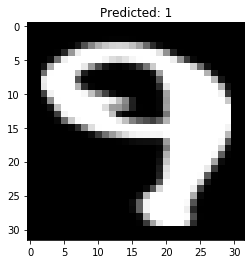

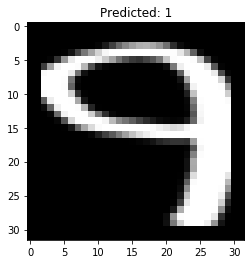

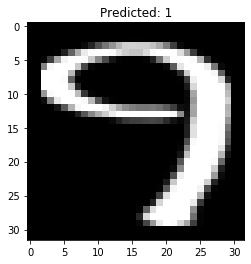

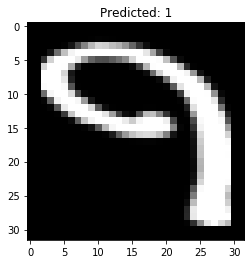

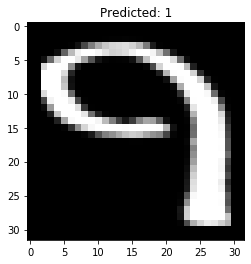

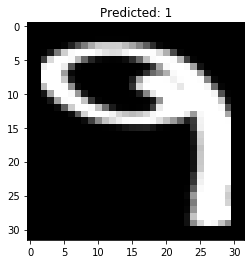

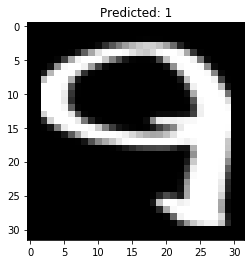

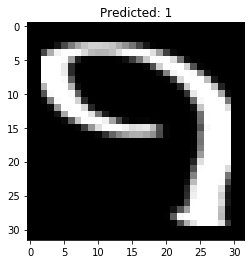

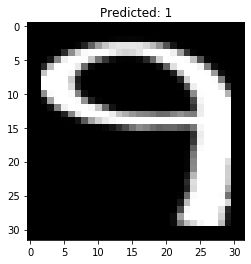

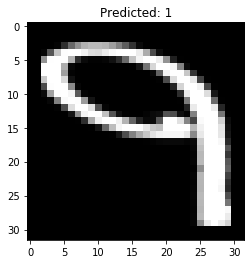

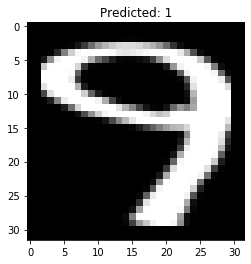

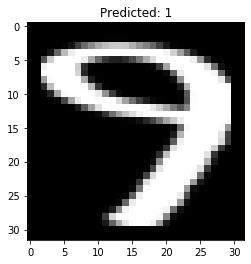

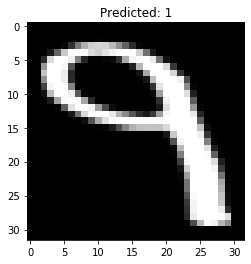

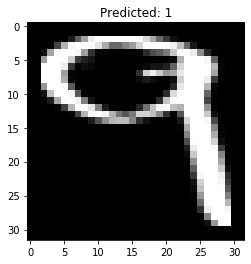

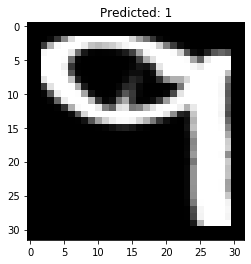

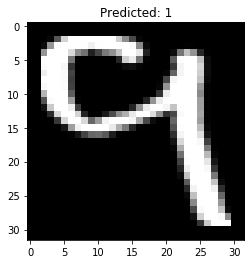

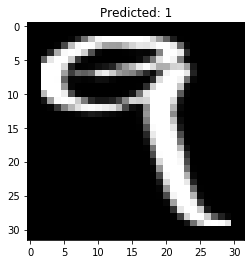

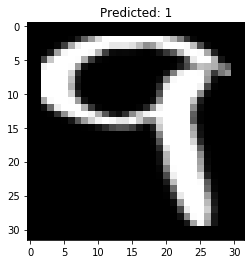

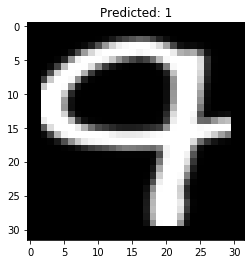

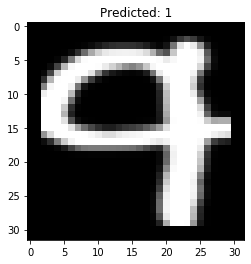

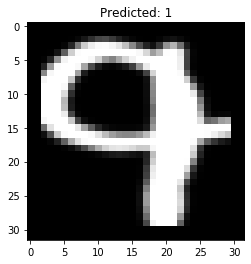

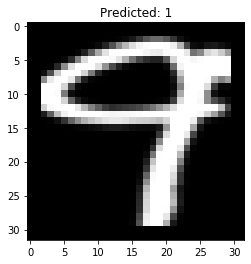

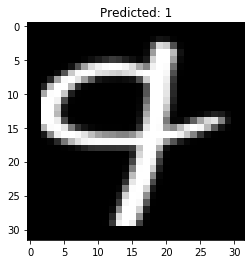

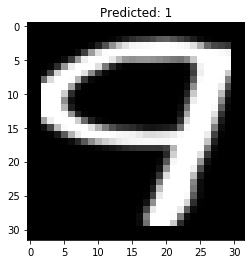

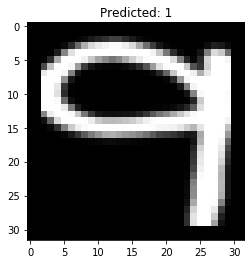

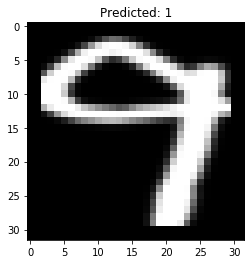

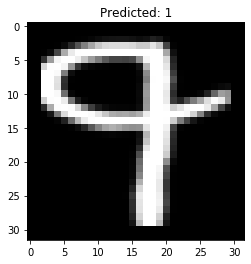

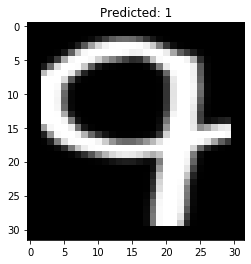

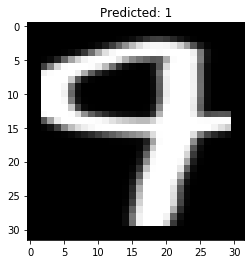

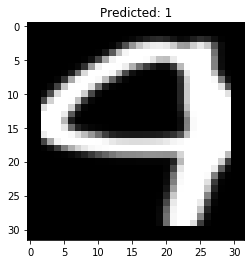

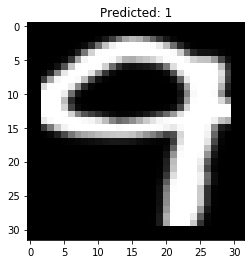

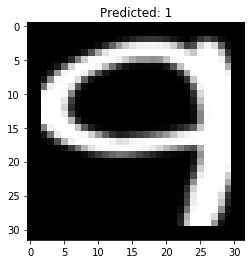

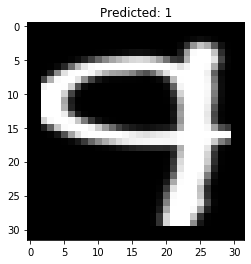

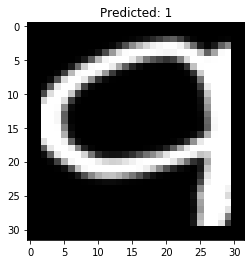

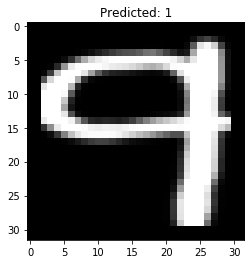

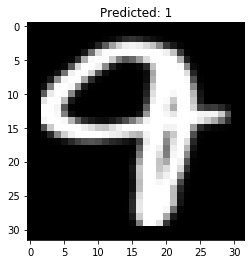

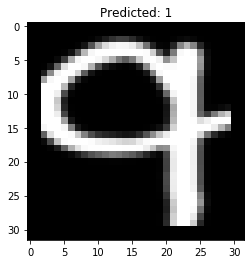

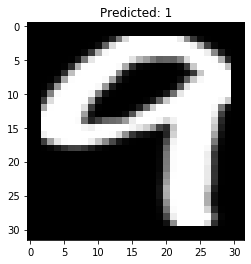

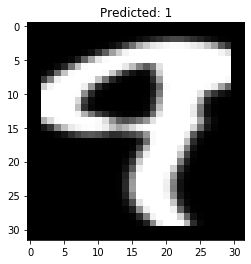

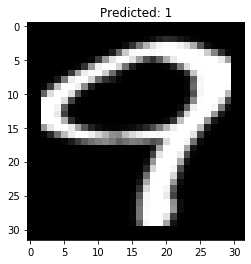

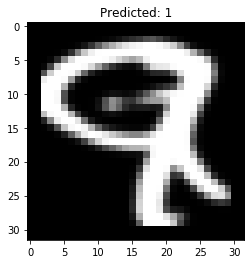

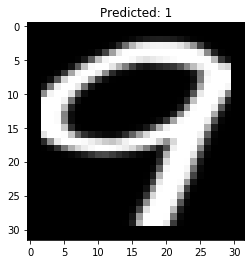

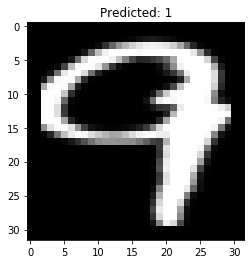

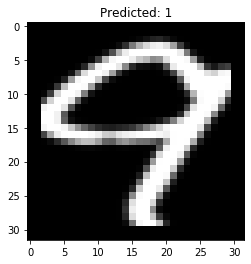

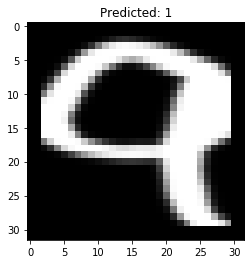

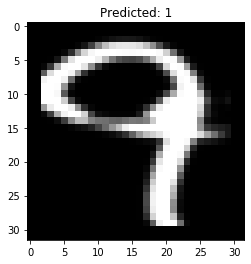

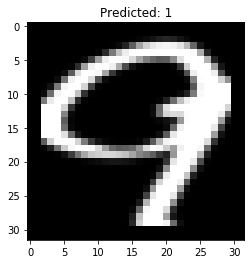

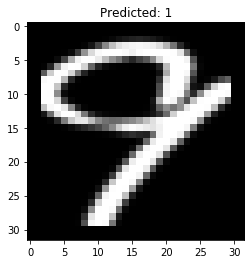

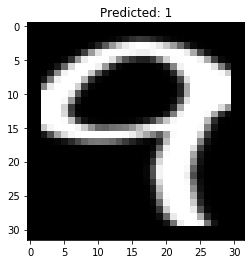

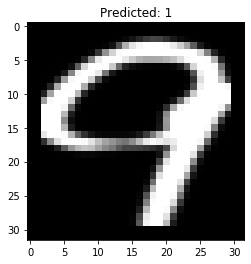

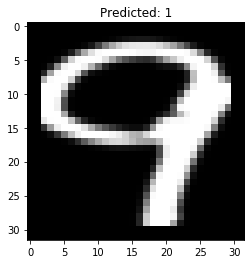

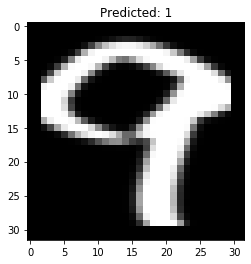

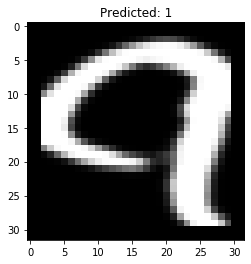

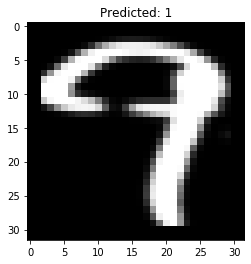

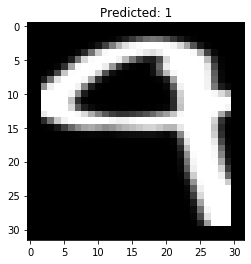

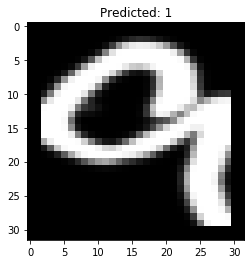

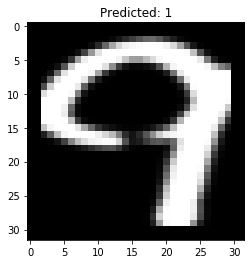

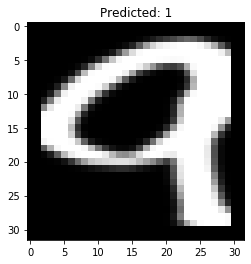

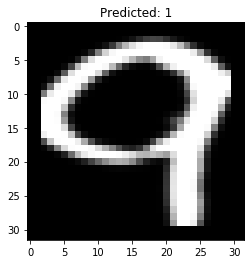

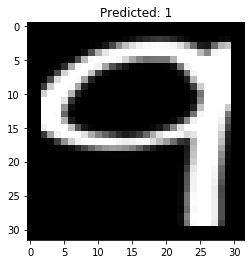

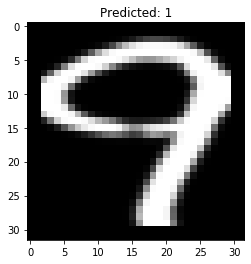

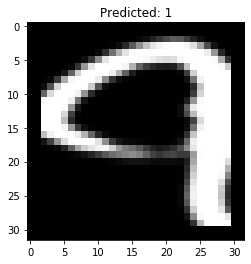

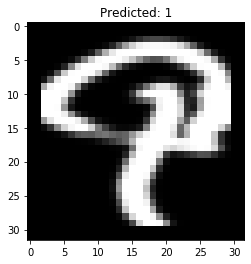

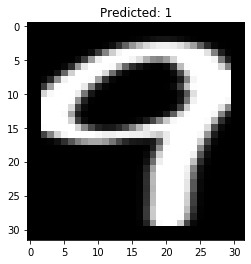

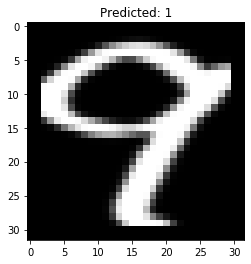

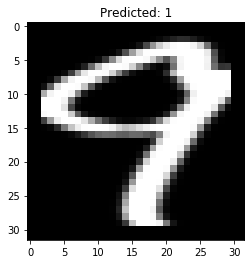

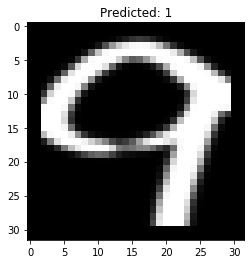

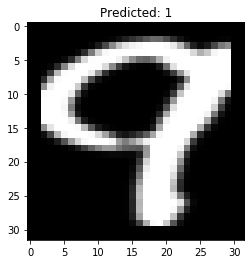

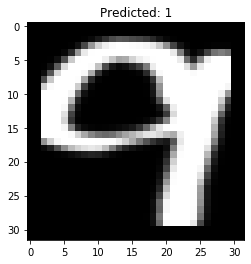

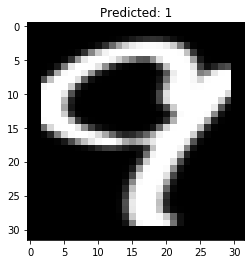

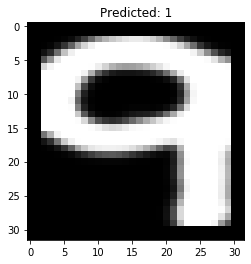

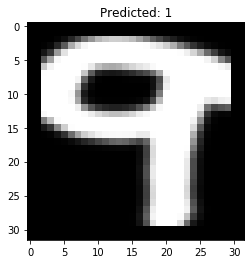

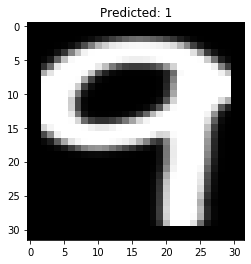

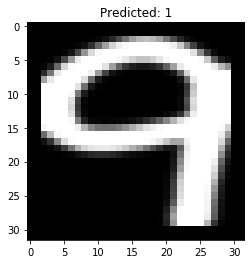

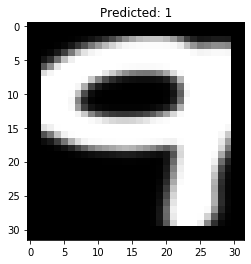

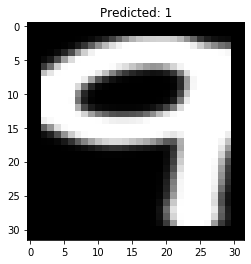

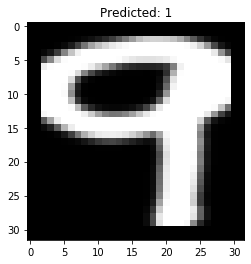

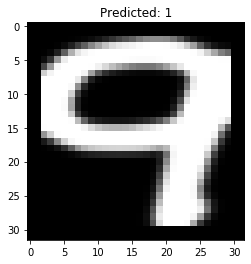

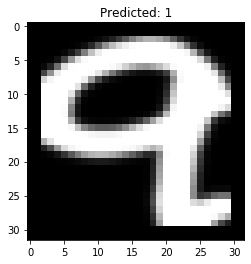

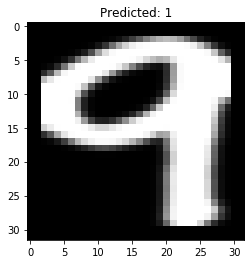

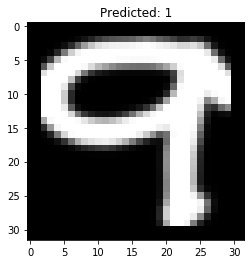

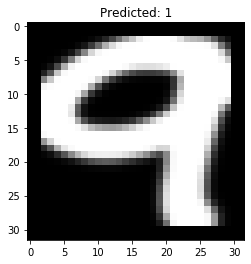

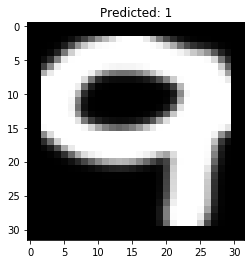

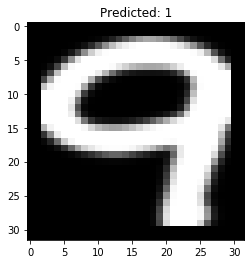

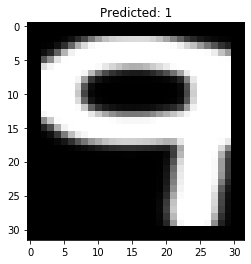

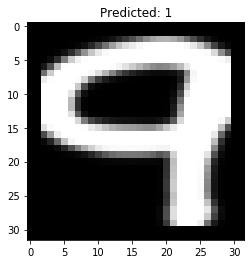

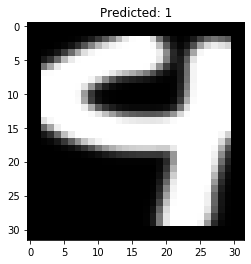

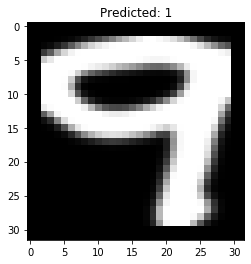

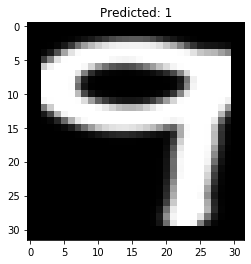

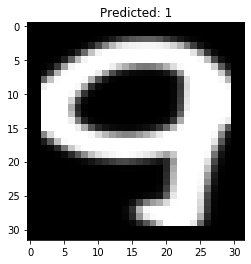

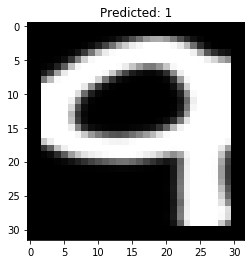

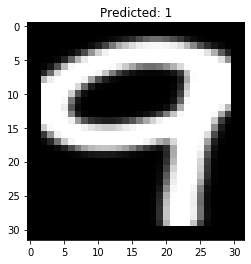

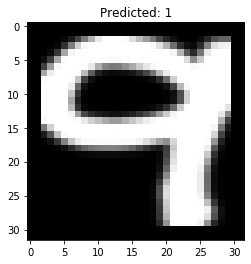

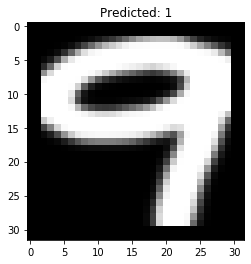

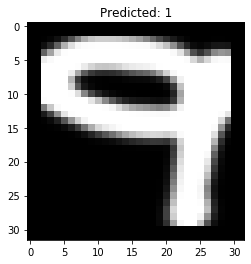

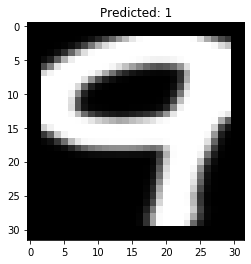

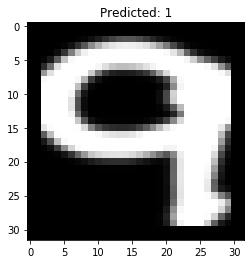

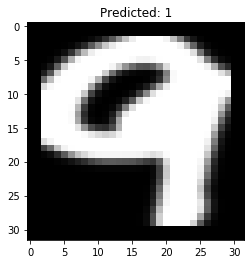

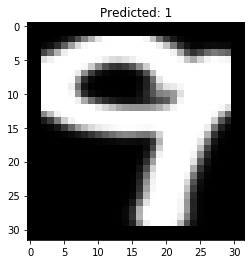

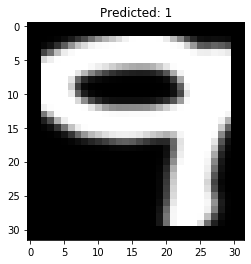

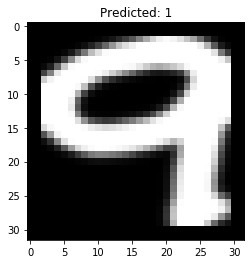

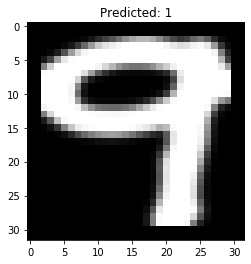

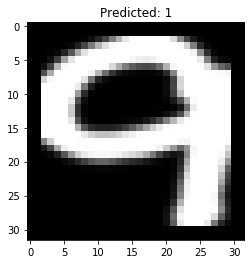

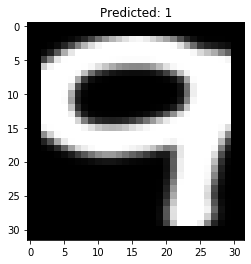

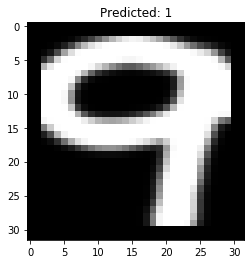

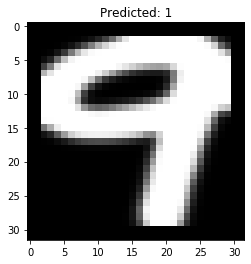

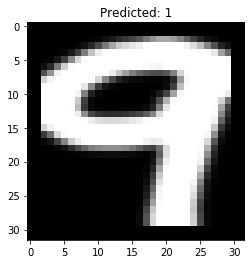

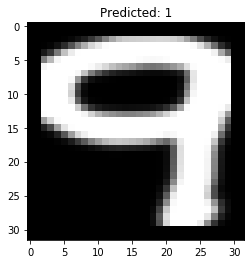

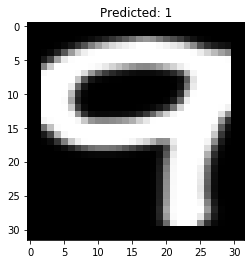

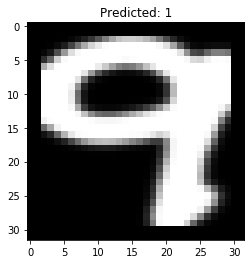

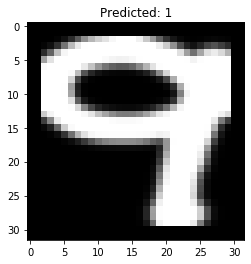

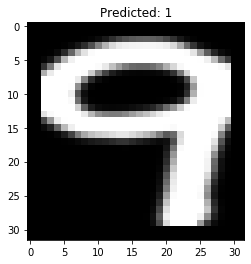

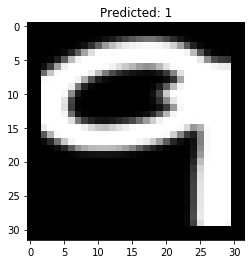

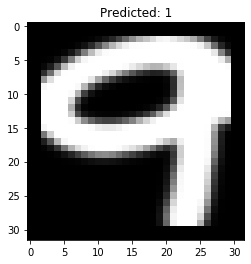

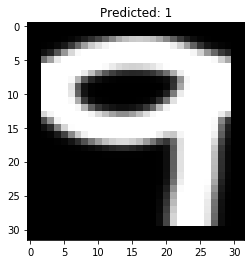

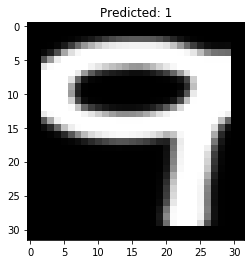

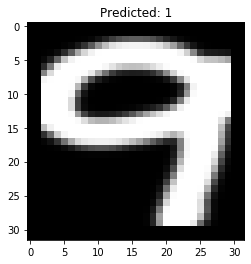

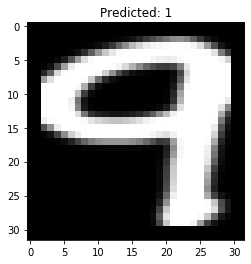

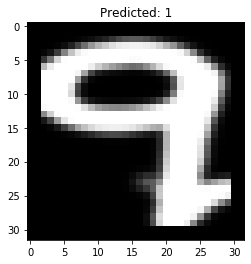

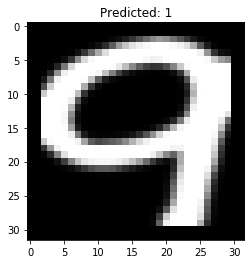

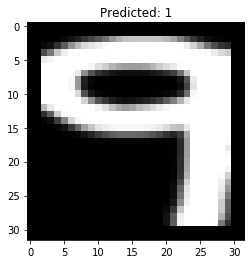

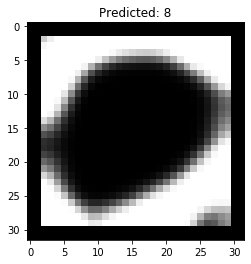

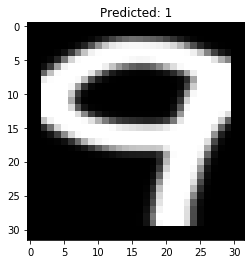

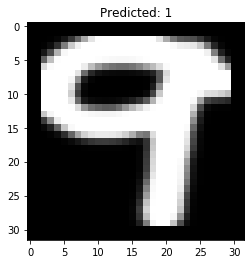

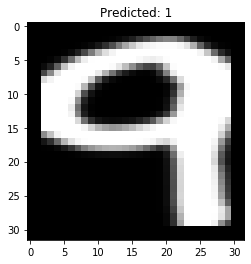

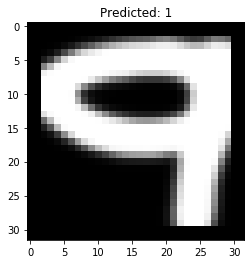

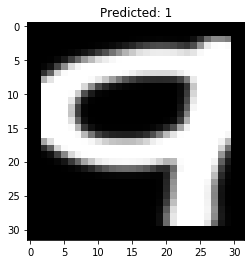

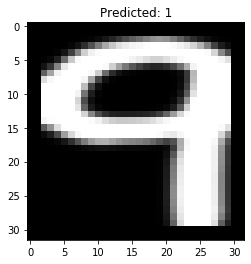

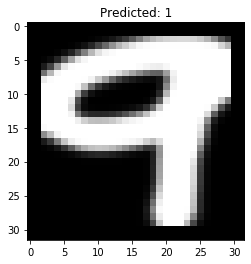

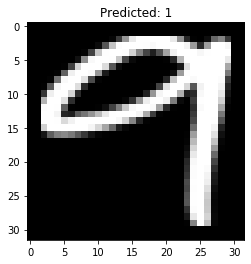

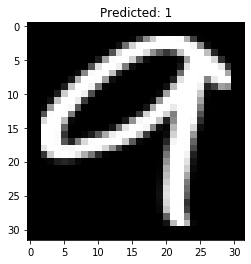

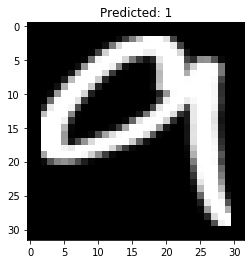

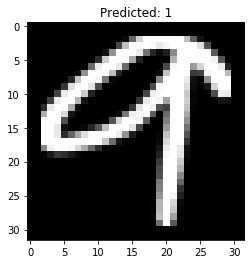

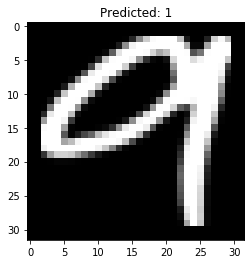

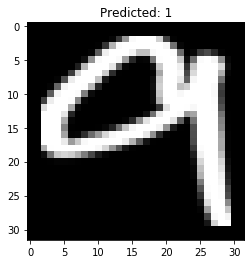

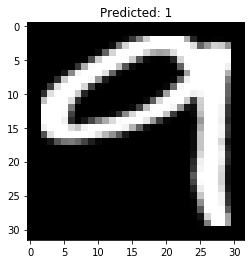

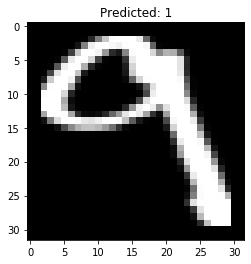

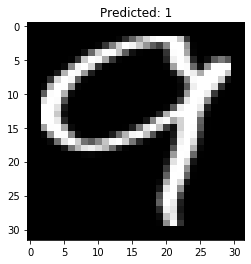

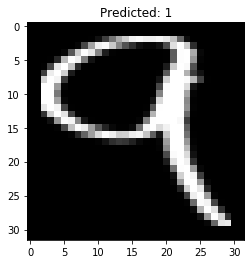

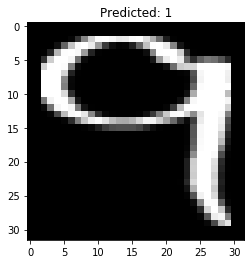

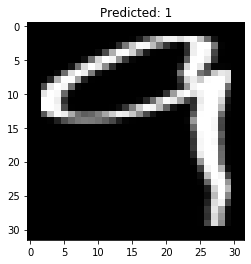

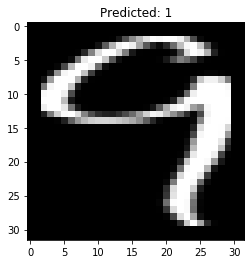

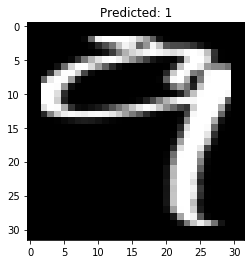

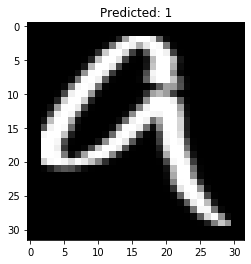

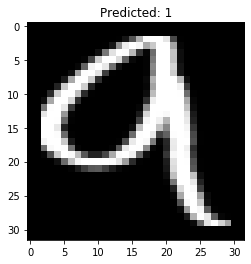

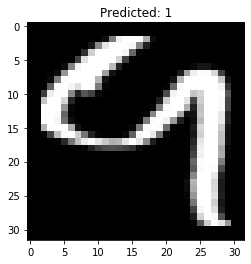

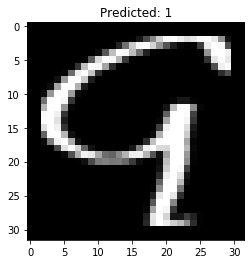

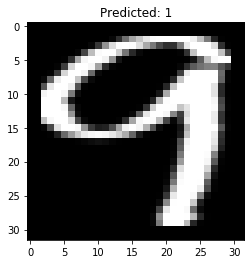

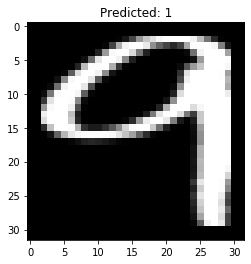

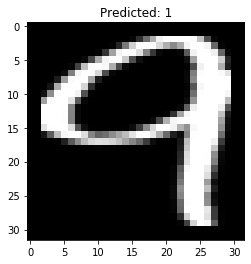

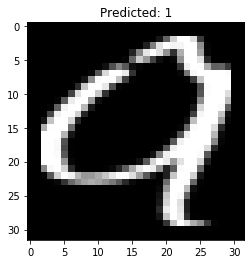

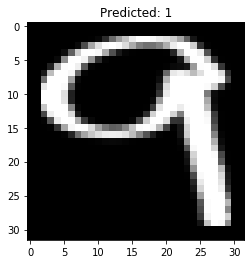

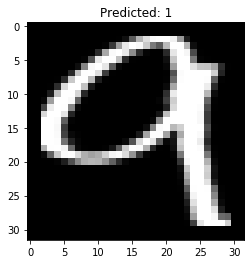

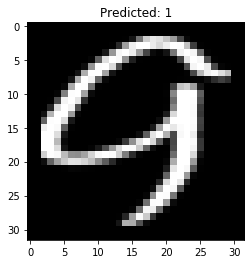

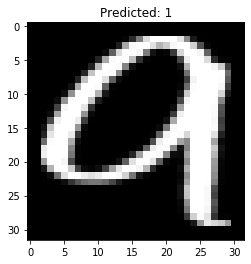

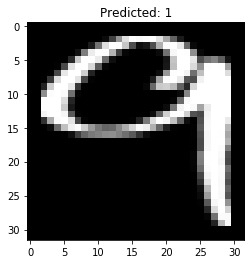

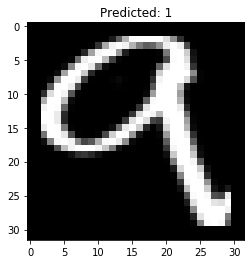

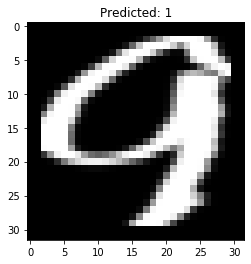

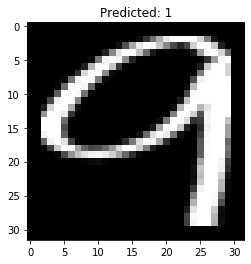

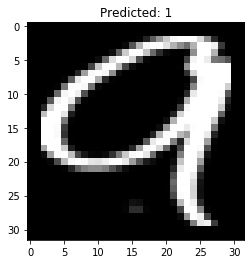

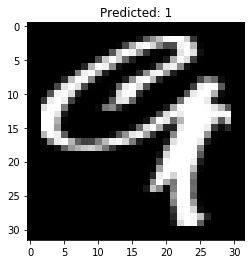

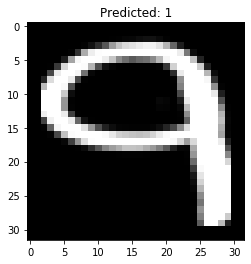

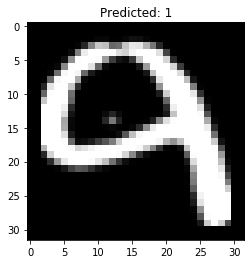

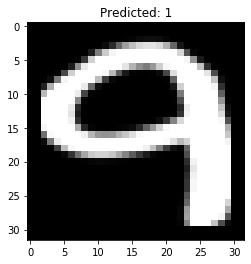

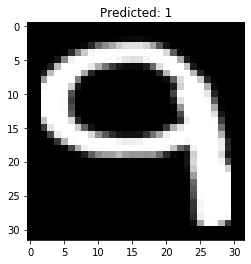

In [ ]:
ek = os.listdir(test_dir)[1]
for image in os.listdir(os.path.join(test_dir, ek)):
    img = "{}/{}/{}".format(test_dir, ek, image)
    plotnpredict(img)

In [ ]:
# Saving the model
PATH
model_json = classifier.to_json()
with open("model-bw-6-class.json", "w") as json_file:
    json_file.write(model_json)
classifier.save_weights('model-bw-6-class.h5')